# Boardgames are made of rules (P6)

## Libraries

In [3]:
import pandas as pd
import numpy as np
import sklearn as sk
from boardgamegeek.api import BGGClient
import os
from pdfminer.high_level import extract_text
import re
import csv
from textstat import flesch_reading_ease as fr_score

In [2]:
bgg = BGGClient()
games_collection = bgg.collection("JacoStu")
games_collection

Collection: (owner: JacoStu, items: 60)

## Create DataFrame with 60 boardgames

In [3]:
games_df = pd.DataFrame(columns=["id", "category", "name", "min_players", "max_players", "average_player_suggestions", "player_suggestions", "playing_time", "rating_average_weight", "how to play", "mechanics"])
for collection_game in games_collection.items:
    games_df = pd.concat([games_df, pd.DataFrame([{"id": bgg.game(game_id=collection_game.id).id, "category":collection_game.comment, "name": bgg.game(game_id=collection_game.id).name, "min_players": bgg.game(game_id=collection_game.id).min_players, "max_players": bgg.game(game_id=collection_game.id).max_players, "player_suggestions": bgg.game(game_id=collection_game.id).player_suggestions, "playing_time": bgg.game(game_id=collection_game.id).playing_time, "rating_average_weight": bgg.game(game_id=collection_game.id).rating_average_weight, "mechanics":bgg.game(game_id=collection_game.id).mechanics}])])

/var/folders/d1/155l7gvx13g3mwxhng7df1qr0000gn/T/ipykernel_35469/3897574548.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  games_df = pd.concat([games_df, pd.DataFrame([{"id": bgg.game(game_id=collection_game.id).id, "category":collection_game.comment, "name": bgg.game(game_id=collection_game.id).name, "min_players": bgg.game(game_id=collection_game.id).min_players, "max_players": bgg.game(game_id=collection_game.id).max_players, "player_suggestions": bgg.game(game_id=collection_game.id).player_suggestions, "playing_time": bgg.game(game_id=collection_game.id).playing_time, "rating_average_weight": bgg.game(game_id=collection_game.id).rating_average_weight, "mechanics":bgg.game(game_id=collection_game.id).mechanics}])])


In [4]:
games_df = games_df.reset_index(drop=True)
games_df

,id,category,name,min_players,max_players,average_player_suggestions,player_suggestions,playing_time,rating_average_weight,how to play,mechanics
0,25213,Trivia,30 Seconds,3,24,NaN,[<boardgamegeek.objects.games.PlayerSuggestion...,30,1.1579,NaN,"[Action Timer, Real-Time, Roll / Spin and Move..."
1,68448,Economic,7 Wonders,2,7,NaN,[<boardgamegeek.objects.games.PlayerSuggestion...,30,2.3146,NaN,"[Closed Drafting, End Game Bonuses, Hand Manag..."
2,185343,Economic,Anachrony,1,4,NaN,[<boardgamegeek.objects.games.PlayerSuggestion...,120,3.9991,NaN,"[Contracts, Dice Rolling, Die Icon Resolution,..."
3,67877,Trivia,Anomia,3,6,NaN,[<boardgamegeek.objects.games.PlayerSuggestion...,30,1.0382,NaN,"[Pattern Recognition, Speed Matching]"
4,15987,Adventure,Arkham Horror,1,8,NaN,[<boardgamegeek.objects.games.PlayerSuggestion...,240,3.5850,NaN,"[Cooperative Game, Dice Rolling, Events, Final..."
5,230802,Abstract,Azul,2,4,NaN,[<boardgamegeek.objects.games.PlayerSuggestion...,45,1.7739,NaN,"[Chaining, End Game Bonuses, Grid Coverage, Op..."
6,313,Economic,Big Boss,2,6,NaN,[<boardgamegeek.objects.games.PlayerSuggestion...,90,2.3636,NaN,"[Commodity Speculation, Hand Management, Inves..."
7,272438,Trivia,Blockbuster,4,10,NaN,[<boardgamegeek.objects.games.PlayerSuggestion...,60,1.0476,NaN,"[Acting, Team-Based Game]"
8,224517,Economic,Brass: Birmingham,2,4,NaN,[<boardgamegeek.objects.games.PlayerSuggestion...,120,3.8675,NaN,"[Chaining, End Game Bonuses, Hand Management, ..."
9,46255,Educational,Campaign Manager 2008,2,2,NaN,[<boardgamegeek.objects.games.PlayerSuggestion...,45,2.2157,NaN,"[Area Majority / Influence, Dice Rolling, Hand..."


### Perform the average number of players (on the players suggestions)

In [5]:
games_df["average_player_suggestions"] = games_df["player_suggestions"].apply(lambda l: int(round(np.mean(list(map(lambda ps: ps.numeric_player_count, l))), 0)))

### Sort by category

In [6]:
games_df.sort_values(by="category", inplace=True, ascending=True)
games_df.reset_index(drop=True, inplace=True)

In [7]:
average_num_players = games_df.groupby(games_df.category).agg({"average_player_suggestions":list})
average_num_players["average_player_suggestions"].apply(sorted)

category
Abstract        [2, 2, 2, 3, 3, 3, 3, 4, 4, 4]
Adventure       [2, 2, 3, 3, 3, 3, 4, 5, 5, 5]
Economic        [3, 3, 3, 3, 4, 4, 4, 4, 4, 4]
Educational     [2, 3, 3, 4, 4, 4, 4, 4, 4, 5]
Party game      [4, 4, 4, 5, 6, 6, 6, 6, 7, 7]
Trivia         [4, 4, 4, 4, 5, 5, 6, 6, 7, 13]
Name: average_player_suggestions, dtype: object

In [8]:
durations = games_df.groupby(games_df.category).agg({"playing_time":list})
durations["playing_time"].apply(sorted)


category
Abstract            [10, 15, 20, 40, 45, 45, 50, 60, 60, 60]
Adventure      [30, 30, 60, 60, 90, 120, 150, 180, 240, 480]
Economic        [20, 30, 45, 90, 90, 90, 120, 120, 120, 150]
Educational         [15, 45, 45, 45, 60, 60, 60, 70, 90, 90]
Party game          [20, 30, 40, 40, 42, 45, 45, 45, 45, 90]
Trivia               [0, 20, 25, 30, 30, 30, 30, 40, 60, 90]
Name: playing_time, dtype: object

In [9]:
difficulty = games_df.groupby(games_df.category).agg({"rating_average_weight":list})
difficulty["rating_average_weight"].apply(sorted)


category
Abstract       [1.3636, 1.4444, 1.5645, 1.7739, 1.84, 2.0204,...
Adventure      [1.6932, 1.7384, 1.7955, 1.9273, 2.0164, 2.25,...
Economic       [1.5948, 2.3146, 2.3636, 2.4577, 2.6476, 2.780...
Educational    [1.0388, 1.4928, 2.037, 2.2067, 2.2157, 2.4279...
Party game     [1.1184, 1.1208, 1.1935, 1.2006, 1.3774, 1.735...
Trivia         [1.0, 1.0, 1.0085, 1.0382, 1.0476, 1.1, 1.1579...
Name: rating_average_weight, dtype: object

### Adding manual "how to play" section

In [10]:
path = "Manuals/"
section_start_words = ["how to play", "gameplay", "playing the game", "playing\n the game", "overview of a turn", "player turn order", "turn sequence", "game flow", "turn sequence", "summary of play", "order of play", "the game turn", "a player's turn", "flow of the game", "game overview", "game play", "rounds", "play: do both 1 & 2", "play overview","the act's of the game","player turns", "starting the game", "turn structure", "game round", "game turn", "challenge", "psychic phase", "let's play", "let's play!", "play"]
section_end_words  = ["end of the game", "ending the game", "game end", "how the game ends", "how to win", "finale interaction", "upgrade", "final scoring", "end of the turn", "end of game", "winning the game", "winning or losing the game", "game end and scoring", "winning", "the end of the game is nigh!", "end of game scoring", "end game", "the end of the game", "strategy notes", "victory", "ending and winning the game", "how the game progresses", "who is the winner?", "the end", "win" "end game & end-game goal cards", "finale and game end", "win"]

def find_section(text, start_words, end_words):
    start_pattern = r"(?:{})\s*(?=[:\n])".format("|".join(map(re.escape, start_words)))
    end_pattern   = r"(?:{})\s*(?=[:\n])".format("|".join(map(re.escape, end_words)))
    
    starts = [m.start() for m in re.finditer(start_pattern, text)]
    ends   = [m.start() for m in re.finditer(end_pattern, text)]
    
    if not starts or not ends:
        return re.sub('\n','', text)
    
    start = starts[0]
    end   = ends[-1]
    
    if end <= start:
        return re.sub('\n','', text[start:])
    
    return re.sub('\n','', text[start:end])

def process_manual(manual_path):
    text = extract_text(manual_path).lower().strip()
    return find_section(text, section_start_words, section_end_words)

for category in games_df["category"].unique():
    for manual_name in list(filter(lambda n:n!= ".DS_Store", os.listdir(os.path.join(path, category)))):
        manual_path = os.path.join(path, category, manual_name)

        print(f"processing {manual_name[:-4]} manual in {category} category")
        section_text = process_manual(manual_path)
        mask = games_df["name"].str.lower().str.contains(manual_name[:-4].lower())
        games_df.loc[mask, "how to play"] = section_text


processing HUE manual in Abstract category
processing Monkey Palace manual in Abstract category
processing Samurai manual in Abstract category
processing Azul manual in Abstract category
processing One Zero One manual in Abstract category
processing Hive manual in Abstract category
processing Tak manual in Abstract category
processing Zendo manual in Abstract category
processing Project L manual in Abstract category
processing CULTivate manual in Abstract category


Cannot set gray non-stroke color because /'P0' is an invalid float value
Cannot set gray non-stroke color because /'P0' is an invalid float value
Cannot set gray non-stroke color because /'P0' is an invalid float value


processing Lost Ruins of Arnak manual in Adventure category
processing Forbidden Island manual in Adventure category
processing Nemesis manual in Adventure category
processing Elder Sign manual in Adventure category
processing Kingdom Legacy manual in Adventure category
processing Arkham Horror manual in Adventure category


Cannot set gray non-stroke color because /'P0' is an invalid float value
Cannot set gray non-stroke color because /'P1' is an invalid float value
Cannot set gray non-stroke color because /'P1' is an invalid float value
Cannot set gray non-stroke color because /'P1' is an invalid float value
Cannot set gray stroke color because /'P2' is an invalid float value
Cannot set gray stroke color because /'P3' is an invalid float value
Cannot set gray stroke color because /'P4' is an invalid float value
Cannot set gray stroke color because /'P5' is an invalid float value
Cannot set gray stroke color because /'P6' is an invalid float value
Cannot set gray non-stroke color because /'P0' is an invalid float value
Cannot set gray stroke color because /'P0' is an invalid float value


processing Survive manual in Adventure category


Cannot set gray non-stroke color because /'P1' is an invalid float value
Cannot set gray stroke color because /'P0' is an invalid float value
Cannot set gray stroke color because /'P0' is an invalid float value
Cannot set gray stroke color because /'P1' is an invalid float value
Cannot set gray non-stroke color because /'P2' is an invalid float value
Cannot set gray non-stroke color because /'P0' is an invalid float value
Cannot set gray non-stroke color because /'P0' is an invalid float value
Cannot set gray non-stroke color because /'P1' is an invalid float value


processing The Initiative manual in Adventure category
processing Trailblazers manual in Adventure category
processing Destinies manual in Adventure category
processing Big Boss manual in Economic category
processing Startups manual in Economic category
processing Anachrony manual in Economic category
processing Gaia Project manual in Economic category
processing Brass manual in Economic category
processing The Godfather manual in Economic category
processing Roll for the Galaxy manual in Economic category
processing 7 Wonders manual in Economic category
processing Stone Age manual in Economic category
processing The Manhattan Project manual in Economic category
processing Evolution manual in Educational category
processing Planetarium manual in Educational category
processing Cytosis manual in Educational category
processing Forest Shuffle manual in Educational category
processing Oceans manual in Educational category
processing Climate manual in Educational category
processing Terra 

Cannot set gray stroke color because /'P0' is an invalid float value
Cannot set gray stroke color because /'P1' is an invalid float value
Cannot set gray stroke color because /'P2' is an invalid float value
Cannot set gray stroke color because /'P3' is an invalid float value
Cannot set gray stroke color because /'P4' is an invalid float value
Cannot set gray stroke color because /'P0' is an invalid float value
Cannot set gray stroke color because /'P1' is an invalid float value
Cannot set gray stroke color because /'P2' is an invalid float value
Cannot set gray stroke color because /'P3' is an invalid float value


processing Dixit manual in Party game category
processing Taboo manual in Party game category
processing Tortuga 1667 manual in Party game category
processing Trivial Pursuit manual in Trivia category
processing Map It! manual in Trivia category
processing Blockbuster manual in Trivia category
processing Wits & Wagers manual in Trivia category
processing Colourbrain manual in Trivia category
processing Crack List manual in Trivia category
processing Think 'n Sync manual in Trivia category
processing Anomia manual in Trivia category
processing Hitster manual in Trivia category
processing 30 Seconds manual in Trivia category


In [12]:
games_df.to_csv('BoardGamesData.csv', index=False, sep=",", quoting=csv.QUOTE_ALL)

## Create the prompts for the LLMs

### LLMs:
    - Google Gemma-3-270m-it-8bit (small)
    - DeepSeek-R1-Distill-Qwen-1.5B-MLX-Q8 (medium)
    - Meta Llama-3-8B-Instruct-8bit (medium-large)

### Loading the created dataset

In [4]:
saved_games_df = pd.read_csv("BoardGamesData.csv", delimiter=",")
saved_games_df.head()

,id,category,name,min_players,max_players,average_player_suggestions,player_suggestions,playing_time,rating_average_weight,how to play,mechanics
0,6830,Abstract,Zendo,2,6,4,[<boardgamegeek.objects.games.PlayerSuggestion...,60,2.5253,summary of playthe moderator begins by selecti...,"['Induction', 'Pattern Recognition', 'Simultan..."
1,2655,Abstract,Hive,2,2,2,[<boardgamegeek.objects.games.PlayerSuggestion...,20,2.3145,"game hive rules starting with white, players a...","['Enclosure', 'Grid Movement', 'Hexagon Grid',..."
2,197405,Abstract,Tak,2,2,2,[<boardgamegeek.objects.games.PlayerSuggestion...,60,2.4416,gameplayon your turn you may either place a pi...,"['Grid Movement', 'Network and Route Building'..."
3,329002,Abstract,CULTivate,2,5,4,[<boardgamegeek.objects.games.PlayerSuggestion...,50,1.3636,"playing the gameon a playerʼs turn, the player...","['Card Play Conflict Resolution', 'End Game Bo..."
4,3,Abstract,Samurai,2,4,3,[<boardgamegeek.objects.games.PlayerSuggestion...,60,2.4426,turn sequence 1. place token(s) the player sel...,"['Area Majority / Influence', 'Hand Management..."


In [14]:
saved_games_df[saved_games_df["name"]=="Elder Sign"]["how to play"]

16    player turn order1. movethe player may move to...
Name: how to play, dtype: object

### Task 1: explain rulebook

In [5]:
MODELS = {"Google" : "mlx-community/gemma-3-270m-it-8bit", "DeepSeek" : "mlx-community/DeepSeek-R1-Distill-Qwen-1.5B-MLX-Q8", "Meta" : "mlx-community/Meta-Llama-3-8B-Instruct-8bit"}
for company in MODELS.keys():
    saved_games_df["explanation_"+company] = None
    saved_games_df["explanation_"+company+"_flesch_score"] = 0.0
    saved_games_df["explanation_"+company+"_human_score"] = 0.0
    saved_games_df["mechanics_"+company] = None
    saved_games_df["weight_"+company] = 0.0
    saved_games_df["players_number_"+company] = 0
    saved_games_df["duration_"+company] = 0

In [180]:
saved_games_df.columns

Index(['id', 'category', 'name', 'min_players', 'max_players',
       'average_player_suggestions', 'player_suggestions', 'playing_time',
       'rating_average_weight', 'how to play', 'mechanics',
       'explanation_Google', 'explanation_Google_flesch_score',
       'mechanics_Google', 'weight_Google', 'players_number_Google',
       'duration_Google', 'explanation_DeepSeek',
       'explanation_DeepSeek_flesch_score', 'mechanics_DeepSeek',
       'weight_DeepSeek', 'players_number_DeepSeek', 'duration_DeepSeek',
       'explanation_Meta', 'explanation_Meta_flesch_score', 'mechanics_Meta',
       'weight_Meta', 'players_number_Meta', 'duration_Meta'],
      dtype='object')

In [6]:
from mlx_lm import load, generate

/Users/jacopostucchi/Documents/UNIVERSITÀ/MAGISTRALE/CORSI/2 SEMESTRE/Natural language processing/Project/boardgames_project_env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
def fill_prompt(name, section, instruction):
    instructions = {"explain": f"Instruction: explain the '{name}' boardgame rulebook's section 'how to play' in simple and conversational terms, like if you have to explain it to a child.",
                    "classify": """Instruction: you have to classify some values from the boardgame.

                                    Task: Extract the following values and output ONLY in JSON format with these keys:
                                    - mechanics (a list of strings)
                                    - difficulty (a number between 1.0 and 5.0)
                                    - players (a number between 1 and infinite)
                                    - duration (a number, in minutes)

                                    Do NOT include any explanation or extra text. Just output the JSON.

                                    Here is an example:

                                    Input: “In this game each player starts with 5 cards, draws one each turn, etc…”  
                                    Output:
                                    {
                                    "mechanics": ["Hand Management", "Set Collection"],
                                    "difficulty": "2.5",
                                    "players": "4",
                                    "duration": "30"
                                    }
                                """
                    }
    chunks = []
    section_len = len(section)
    if section_len > 8000:
        start = 0
        end = 8000
        while end < (section_len + 8000):
            chunks.append(section[start:end])
            start = end
            end += 8000
    else:
        chunks = [section]
    return (instructions[instruction], chunks)

In [8]:
def extract_response(text):
    if "</think>" in text:
        text = text.split("</think>")[-1]

    text = re.sub(r"(Thought:|Reasoning:|## Thinking).*?(?=\n|$)", "", text)

    return text.strip()


In [20]:
for company, llm in MODELS.items():   
    print(f">> Loading {company}'s '{llm}' model from Hugging Face transformers...")
    model, tokenizer = load(llm)

    if company == "Meta":
        tokenizer.add_eos_token("<|eot_id|>")

    print(f"?? Querying {company}'s model '{llm}'...")

    for i in range(0,len(saved_games_df),10):
        print(f"Explaining game n. {i}") 

        if company == "DeepSeek":
            messages = [
                {"role":"system", "content": "You are a helpful assistant. You MUST NOT reveal any internal chain-of-thought, reasoning or 'thinking' text. Output ONLY the final answer, no reasoning, no internal steps, no commentary."},
                {"role":"assistant", "content":"Ok, got it."},
                {"role": "user", "content": "You will be given a boardgame's rulebook divided in chunks. Do the following instruction."}
            ]
        else:
            messages = [
                {"role": "user", "content": "You will be given a boardgame's rulebook divided in chunks. Do the following instruction."}
            ]
        instruction, prompt_chunks = fill_prompt(saved_games_df.loc[i]["name"], saved_games_df.loc[i]["how to play"], "explain")
        messages.append({"role": "assistant", "content": "Ok, waiting for chunks"})

        if tokenizer.chat_template is not None:
            if len(prompt_chunks) > 1:
                for chunk in prompt_chunks[:len(prompt_chunks)-1]:
                    messages.append({"role": "user", "content": chunk})
                    messages.append({"role": "assistant", "content": "Received chunk. Go on"})
                messages.append({"role": "user", "content": prompt_chunks[-1]})
            else:
                messages.append({"role": "user", "content": prompt_chunks[0]})
            
            messages.append({"role":"assistant", "content": "What do I have to do?"})
            messages.append({"role": "user", "content": instruction})

            prompt = tokenizer.apply_chat_template(messages, add_generation_prompt=True)
        else:
            prompt = instruction + ' '.join(prompt_chunks)

        response = generate(model, tokenizer, prompt=prompt, max_tokens=1500)
        saved_games_df.loc[i, f"explanation_{company}"] = extract_response(response)

>> Loading Google's 'mlx-community/gemma-3-270m-it-8bit' model from Hugging Face transformers...


Fetching 8 files: 100%|██████████| 8/8 [00:00<00:00, 101067.57it/s]


?? Querying Google's model 'mlx-community/gemma-3-270m-it-8bit'...
Explaining game n. 0
Explaining game n. 10
Explaining game n. 20
Explaining game n. 30
Explaining game n. 40
Explaining game n. 50
>> Loading DeepSeek's 'mlx-community/DeepSeek-R1-Distill-Qwen-1.5B-MLX-Q8' model from Hugging Face transformers...


Fetching 6 files: 100%|██████████| 6/6 [00:00<00:00, 66576.25it/s]


?? Querying DeepSeek's model 'mlx-community/DeepSeek-R1-Distill-Qwen-1.5B-MLX-Q8'...
Explaining game n. 0
Explaining game n. 10
Explaining game n. 20
Explaining game n. 30
Explaining game n. 40
Explaining game n. 50
>> Loading Meta's 'mlx-community/Meta-Llama-3-8B-Instruct-8bit' model from Hugging Face transformers...


Fetching 7 files: 100%|██████████| 7/7 [00:00<00:00, 60287.74it/s]


?? Querying Meta's model 'mlx-community/Meta-Llama-3-8B-Instruct-8bit'...
Explaining game n. 0
Explaining game n. 10
Explaining game n. 20
Explaining game n. 30
Explaining game n. 40
Explaining game n. 50


In [22]:
print(saved_games_df["explanation_Meta"])

0     So, Zendo is a fun board game where you try to...
1                                                  None
2                                                  None
3                                                  None
4                                                  None
5                                                  None
6                                                  None
7                                                  None
8                                                  None
9                                                  None
10    So, let's talk about how to play "Kingdom Lega...
11                                                 None
12                                                 None
13                                                 None
14                                                 None
15                                                 None
16                                                 None
17                                              

#### Measure explanation linguistic level

In [9]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('cmudict')

[nltk_data] Downloading package cmudict to
[nltk_data]     /Users/jacopostucchi/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


True

In [182]:
for company,llm in MODELS.items():
    indexes = saved_games_df.loc[~saved_games_df["explanation_"+company].isna()].index

for i in indexes:
    for company,llm in MODELS.items():
        saved_games_df.loc[i, "explanation_"+company+"_flesch_score"] = fr_score(saved_games_df.loc[i]["explanation_"+company])

In [183]:
saved_games_df.loc[0][["explanation_Google_flesch_score", "explanation_DeepSeek_flesch_score", "explanation_Meta_flesch_score"]]

explanation_Google_flesch_score      0.0
explanation_DeepSeek_flesch_score    0.0
explanation_Meta_flesch_score        0.0
Name: 0, dtype: object

### Task 2: invent a boardgame based on a concept or theme

In [34]:
new_board_games = dict({"Google":{}, "DeepSeek":{}, "Meta":{}})

In [37]:
concept = ""
theme = ""

for company, llm in MODELS.items():
    messages=[]
    
    print(f">> Loading {company}'s '{llm}' model from Hugging Face transformers...")
    model, tokenizer = load(llm)

    if company == "Meta":
        tokenizer.add_eos_token("<|eot_id|>")

    if company == "DeepSeek":
        messages = [{"role":"system", "content": "You are a helpful assistant. You MUST NOT reveal any internal chain-of-thought, reasoning or 'thinking' text. Output ONLY the final answer, no reasoning, no internal steps, no commentary."}]

    print(f"?? Querying {company}'s model '{llm}'...")

    content = "Invent a boardgame of your choice"

    if concept != "":
        content+= f"which uses the concept '{concept}"
    if theme != "":
        content+= f"about the theme '{theme}"
    if concept == "" and theme == "":
        content+=". I let you choose all the possible variables"
        
    if tokenizer.chat_template is not None:
        messages.append({"role": "user", "content": content})
        prompt = tokenizer.apply_chat_template(messages, add_generation_prompt=True)
    else:
        prompt = content

    response = generate(model, tokenizer, prompt=prompt, max_tokens=2000)
    
    new_board_games[company]["text"] = extract_response(response)
    new_board_games[company]["flesch_score"] = fr_score(extract_response(response))


>> Loading Google's 'mlx-community/gemma-3-270m-it-8bit' model from Hugging Face transformers...


Fetching 8 files: 100%|██████████| 8/8 [00:00<00:00, 80082.18it/s]


?? Querying Google's model 'mlx-community/gemma-3-270m-it-8bit'...
>> Loading DeepSeek's 'mlx-community/DeepSeek-R1-Distill-Qwen-1.5B-MLX-Q8' model from Hugging Face transformers...


Fetching 6 files: 100%|██████████| 6/6 [00:00<00:00, 85890.18it/s]


?? Querying DeepSeek's model 'mlx-community/DeepSeek-R1-Distill-Qwen-1.5B-MLX-Q8'...
>> Loading Meta's 'mlx-community/Meta-Llama-3-8B-Instruct-8bit' model from Hugging Face transformers...


Fetching 7 files: 100%|██████████| 7/7 [00:00<00:00, 65536.00it/s]


?? Querying Meta's model 'mlx-community/Meta-Llama-3-8B-Instruct-8bit'...


In [38]:
print(new_board_games["DeepSeek"]["text"])

**Title: *CardCrafters***

**Objective:**  
The goal is to collect enough resources to build a specific structure, such as a "Wall of Strength" or a "Bridge of Unity," or to reach the "Center of Balance" without losing resources.

**Components:**

- **Board:** A 5x5 grid with colored squares. Each square is labeled with a card type: action, resource, or goal.
- **Pieces:** Tokens representing different card types (red for action, blue for resources, green for goals).
- **Rules:**  
  - Action cards allow movement forward or draw additional pieces.
  - Resource cards double your resources or allow trading for action cards.
  - Goal cards require reaching a specific square or building a structure.
- **Additional Twist:**  
  - Action cards have a 10% chance to trigger a "Trick of Time," which allows you to draw an extra piece or create an item that affects the board.

**How to Play:**

1. **Setup:**  
   - Place all pieces on the starting square.
   - Draw cards from a deck to collect yo

In [35]:
new_board_games_df = pd.DataFrame.from_dict(new_board_games, orient="index", columns=["text","flesch_score"])

In [73]:
new_board_games_df.to_csv('NewGamesData.csv', index=False, sep=",", quoting=csv.QUOTE_ALL)

In [36]:
saved_new_board_games_df = pd.read_csv('NewGamesData.csv', delimiter=',')
saved_new_board_games_df["originality"] = [60, 70, 85]

In [37]:
saved_new_board_games = saved_new_board_games_df.to_dict('index')
saved_new_board_games

{0: {'text': 'Okay, I\'m excited to invent a board game! Let\'s dive in. I\'ll choose **"Celestial Cartographers"**.\n\nHere\'s the board game concept:\n\n**Celestial Cartographers** is a strategy board game where players are celestial cartographers charting unexplored regions of the night sky. They must carefully manage resources, build structures, and navigate the ever-changing celestial landscape to achieve their goals.\n\n**Key Features:**\n\n*   **Strategic Planning:** Players must plan their actions carefully, considering the resources available, the potential hazards, and the overall strategic goals of the game.\n*   **Resource Management:** Players must manage their resources (energy, materials, and technology) to build structures, research new technologies, and complete objectives.\n*   **Structure Building:** Players can build structures to improve their resource production, protect against hazards, and enhance their overall capabilities.\n*   **Technology Advancement:** Play

### Task 3: classify the mechanics, the complexity, the perfect number of players and the duration.

In [11]:
import json 

def extract_values(text):
    start = re.search("{", text)
    end = re.search("}", text)

    if "}" in text:
        return json.loads(re.sub('\n','', text[start.start():end.end()]))
    else:
        if text[-1] == ",":
            return json.loads(re.sub('\n','', text[start.start():len(text)-1]+"]}"))
        else:
            return json.loads(re.sub('\n','', text[start.start():len(text)]+"\"]}"))


In [32]:
for company, llm in MODELS.items():
    # if company in ["Google"]:
    #     continue

    # messages = [
    #     {"role": "user", "content": "You will be given some boardgames' rulebooks divided in chunks. Do the following instruction."}
    # ]
    
    print(f">> Loading {company}'s '{llm}' model from Hugging Face transformers...")
    model, tokenizer = load(llm)

    if company == "Meta":
        tokenizer.add_eos_token("<|eot_id|>")

    print(f"?? Querying {company}'s model '{llm}'...")

    for i in range(0,len(saved_games_df)): 
        if company == "DeepSeek":
            messages = [
                {"role":"system", "content": "You are a helpful classifier assistant. You MUST NOT reveal any internal reasoning or 'thinking' text. Output ONLY the final answer, no reasoning, no internal steps, no commentary. Think less, answer more concise."},
                {"role":"assistant", "content":"Ok, got it."},
                {"role": "user", "content": "You will be given a boardgame's rulebook divided in chunks. Do the following instruction."}
            ]
        else:
            messages = [
                {"role": "user", "content": "You will be given a boardgame's rulebook divided in chunks. Do the following instruction."}
            ]

        instruction, prompt_chunks = fill_prompt(saved_games_df.loc[i]["name"], saved_games_df.loc[i]["how to play"], "classify")
        messages.append({"role": "assistant", "content": "Ok, waiting for chunks"})

        print("Classifying game n.", i)
        # , "chunks:",prompt_chunks)

        if tokenizer.chat_template is not None:
            if len(prompt_chunks) > 1:
                for chunk in prompt_chunks[:len(prompt_chunks)-1]:
                    messages.append({"role": "user", "content": chunk})
                    messages.append({"role": "assistant", "content": "Received chunk. Go on"})
                messages.append({"role": "user", "content": prompt_chunks[-1]})
            else:
                messages.append({"role": "user", "content": ' '.join(prompt_chunks)})

            messages.append({"role":"assistant", "content": "What do I have to do?"})
            messages.append({"role": "user", "content": instruction})

            # print(messages)

            prompt = tokenizer.apply_chat_template(messages, add_generation_prompt=True)
        else:
            prompt = instruction + ' '.join(prompt_chunks)

        response = generate(model, tokenizer, prompt=prompt, max_tokens=8000)
        extracted_response = extract_response(response)
        print(f"---{company}---\n\n {extracted_response}")
        classification_values = extract_values(extracted_response)
        saved_games_df.loc[i, f"mechanics_{company}"] = str(classification_values["mechanics"]) if "mechanics" in classification_values.keys() else None
        saved_games_df.loc[i, f"weight_{company}"] = str(classification_values["difficulty"]) if "difficulty" in classification_values.keys() else None
        saved_games_df.loc[i, f"players_number_{company}"] = str(classification_values["players"]) if "players" in classification_values.keys() else None
        saved_games_df.loc[i, f"duration_{company}"] = str(classification_values["duration"]) if "duration" in classification_values.keys() else None

>> Loading Google's 'mlx-community/gemma-3-270m-it-8bit' model from Hugging Face transformers...


Fetching 8 files: 100%|██████████| 8/8 [00:00<00:00, 129055.51it/s]


?? Querying Google's model 'mlx-community/gemma-3-270m-it-8bit'...
Classifying game n. 0
---Google---

 ```json
{
  "mechanics": ["Hand Management", "Set Collection"],
  "difficulty": "2.5",
  "players": "4"
}
```
Classifying game n. 1


/var/folders/d1/155l7gvx13g3mwxhng7df1qr0000gn/T/ipykernel_35469/3165230354.py:58: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  saved_games_df.loc[i, f"weight_{company}"] = str(classification_values["difficulty"]) if "difficulty" in classification_values.keys() else None
/var/folders/d1/155l7gvx13g3mwxhng7df1qr0000gn/T/ipykernel_35469/3165230354.py:59: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  saved_games_df.loc[i, f"players_number_{company}"] = str(classification_values["players"]) if "players" in classification_values.keys() else None


---Google---

 ```json
{
    "mechanics": ["Hand Management", "Set Collection"],
    "difficulty": "2.5",
    "players": "4",
    "duration": "30"
}
```
Classifying game n. 2


/var/folders/d1/155l7gvx13g3mwxhng7df1qr0000gn/T/ipykernel_35469/3165230354.py:60: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '30' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  saved_games_df.loc[i, f"duration_{company}"] = str(classification_values["duration"]) if "duration" in classification_values.keys() else None


---Google---

 ```json
{
"mechanics": ["Hand Management", "Set Collection"],
"difficulty": "2.5",
"players": "4"
}
```
Classifying game n. 3
---Google---

 ```json
{
    "mechanics": ["Hand Management", "Set Collection"],
    "difficulty": "2.5",
    "players": "4",
    "duration": "30"
}
```
Classifying game n. 4
---Google---

 ```json
{
  "mechanics": ["Hand Management", "Set Collection"],
  "difficulty": "2.5",
  "players": "4"
}
```
Classifying game n. 5
---Google---

 ```json
{
    "mechanics": ["Hand Management", "Set Collection"],
    "difficulty": "2.5",
    "players": "4",
    "duration": "30"
}
```
Classifying game n. 6
---Google---

 ```json
{
"mechanics": ["Hand Management", "Set Collection"],
"difficulty": "2.5",
"players": "4"
}
```
Classifying game n. 7
---Google---

 ```json
{
  "mechanics": ["Hand Management", "Set Collection"],
  "difficulty": "2.5",
  "players": "4"
}
```
Classifying game n. 8
---Google---

 ```json
{
"mechanics": ["Hand Management", "Set Collection"

Fetching 6 files: 100%|██████████| 6/6 [00:00<00:00, 81180.08it/s]


?? Querying DeepSeek's model 'mlx-community/DeepSeek-R1-Distill-Qwen-1.5B-MLX-Q8'...
Classifying game n. 0
---DeepSeek---

 ```json
{
  "mechanics": ["Hand Management", "Set Collection"],
  "difficulty": 2.5,
  "players": 4,
  "duration": 30
}
```
Classifying game n. 1


/var/folders/d1/155l7gvx13g3mwxhng7df1qr0000gn/T/ipykernel_35469/3165230354.py:58: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  saved_games_df.loc[i, f"weight_{company}"] = str(classification_values["difficulty"]) if "difficulty" in classification_values.keys() else None
/var/folders/d1/155l7gvx13g3mwxhng7df1qr0000gn/T/ipykernel_35469/3165230354.py:59: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  saved_games_df.loc[i, f"players_number_{company}"] = str(classification_values["players"]) if "players" in classification_values.keys() else None
/var/folders/d1/155l7gvx13g3mwxhng7df1qr0000gn/T/ipykernel_35469/3165230354.py:60: FutureWarning: 

---DeepSeek---

 ```json
{
  "mechanics": ["Movement Rules", "Bug Behaviors", "Movement Abilities", "Jump Mechanics", "Fall Mechanics", "Hive Splitting", "Power Mechanisms"],
  "difficulty": "2.5",
  "players": "4",
  "duration": "30"
}
```
Classifying game n. 2
---DeepSeek---

 ```json
{
  "mechanics": ["Piece Placement", "Stack Management", "Barrier Handling", "Game Flow"],
  "difficulty": "2.5",
  "players": "4",
  "duration": "30"
}
```
Classifying game n. 3
---DeepSeek---

 ```json
{
  "mechanics": ["Hand Management", "Set Collection", "Card Draw", "Special Rules"],
  "difficulty": "3.5",
  "players": "4",
  "duration": "60"
}
```
Classifying game n. 4
---DeepSeek---

 ```json
{
  "mechanics": ["Hand Management", "Set Collection"],
  "difficulty": "2.5",
  "players": "4",
  "duration": "30"
}
```
Classifying game n. 5
---DeepSeek---

 ```json
{
  "mechanics": "",
  "difficulty": "",
  "players": "",
  "duration": ""
}
```
Classifying game n. 6
---DeepSeek---

 ```json
{
  "mechani

Fetching 7 files: 100%|██████████| 7/7 [00:00<00:00, 59675.06it/s]


?? Querying Meta's model 'mlx-community/Meta-Llama-3-8B-Instruct-8bit'...
Classifying game n. 0
---Meta---

 {
"mechanics": ["Rulebook", "Building", "Guessing", "Token Management"],
"difficulty": "3.0",
"players": "2+",
"duration": "Unknown"
}
Classifying game n. 1


/var/folders/d1/155l7gvx13g3mwxhng7df1qr0000gn/T/ipykernel_35469/3165230354.py:58: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  saved_games_df.loc[i, f"weight_{company}"] = str(classification_values["difficulty"]) if "difficulty" in classification_values.keys() else None
/var/folders/d1/155l7gvx13g3mwxhng7df1qr0000gn/T/ipykernel_35469/3165230354.py:59: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2+' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  saved_games_df.loc[i, f"players_number_{company}"] = str(classification_values["players"]) if "players" in classification_values.keys() else None
/var/folders/d1/155l7gvx13g3mwxhng7df1qr0000gn/T/ipykernel_35469/3165230354.py:60: FutureWarning:

---Meta---

 {
"mechanics": ["Movement", "Area Control", "Area Influence", "Variable Player Powers", "Variable Setup"],
"difficulty": "3.0",
"players": "2",
"duration": "30"
}
Classifying game n. 2
---Meta---

 {
"mechanics": ["Placement", "Stacking", "Movement"],
"difficulty": "3.0",
"players": "2",
"duration": "Unknown"
}
Classifying game n. 3
---Meta---

 {
"mechanics": ["Hand Management", "Card Drafting", "Area Control", "Area Majority", "Variable Player Powers", "Variable Setup", "Modular Board"],
"difficulty": "3.5",
"players": "2-4",
"duration": "30-60"
}
Classifying game n. 4
---Meta---

 {
"mechanics": ["Area Control", "Area Movement", "Token Placement"],
"difficulty": "3.0",
"players": "2",
"duration": "30"
}
Classifying game n. 5
---Meta---

 {
"mechanics": ["Tile Placement", "Pattern Building", "Area Control"],
"difficulty": "3.0",
"players": "2-4",
"duration": "30-60"
}
Classifying game n. 6
---Meta---

 {
"mechanics": ["Area Control", "Area Enclosure", "Building", "Engine

In [33]:
saved_games_df.head()

,id,category,name,min_players,max_players,average_player_suggestions,player_suggestions,playing_time,rating_average_weight,how to play,...,weight_DeepSeek,players_number_DeepSeek,duration_DeepSeek,explanation_Meta,explanation_Meta_flesch_score,explanation_Meta_human_score,mechanics_Meta,weight_Meta,players_number_Meta,duration_Meta
0,6830,Abstract,Zendo,2,6,4,[<boardgamegeek.objects.games.PlayerSuggestion...,60,2.5253,summary of playthe moderator begins by selecti...,...,2.5,4,30,"So, Zendo is a fun board game where you try to...",84.467974,0.0,"['Rulebook', 'Building', 'Guessing', 'Token Ma...",3.0,2+,Unknown
1,2655,Abstract,Hive,2,2,2,[<boardgamegeek.objects.games.PlayerSuggestion...,20,2.3145,"game hive rules starting with white, players a...",...,2.5,4,30,None,0.000000,0.0,"['Movement', 'Area Control', 'Area Influence',...",3.0,2,30
2,197405,Abstract,Tak,2,2,2,[<boardgamegeek.objects.games.PlayerSuggestion...,60,2.4416,gameplayon your turn you may either place a pi...,...,2.5,4,30,None,0.000000,0.0,"['Placement', 'Stacking', 'Movement']",3.0,2,Unknown
3,329002,Abstract,CULTivate,2,5,4,[<boardgamegeek.objects.games.PlayerSuggestion...,50,1.3636,"playing the gameon a playerʼs turn, the player...",...,3.5,4,60,None,0.000000,0.0,"['Hand Management', 'Card Drafting', 'Area Con...",3.5,2-4,30-60
4,3,Abstract,Samurai,2,4,3,[<boardgamegeek.objects.games.PlayerSuggestion...,60,2.4426,turn sequence 1. place token(s) the player sel...,...,2.5,4,30,None,0.000000,0.0,"['Area Control', 'Area Movement', 'Token Place...",3.0,2,30


In [34]:
saved_games_df.to_csv('BoardGamesDataLLMs.csv', index=False, sep=",", quoting=csv.QUOTE_ALL)

#### Evaluate the classification

##### Loading the processed data

In [7]:
saved_games_llms_data_df = pd.read_csv("BoardGamesDataLLMs.csv", delimiter=",")
saved_games_llms_data_df.head()

,id,category,name,min_players,max_players,average_player_suggestions,player_suggestions,playing_time,rating_average_weight,how to play,...,weight_DeepSeek,players_number_DeepSeek,duration_DeepSeek,explanation_Meta,explanation_Meta_flesch_score,explanation_Meta_human_score,mechanics_Meta,weight_Meta,players_number_Meta,duration_Meta
0,6830,Abstract,Zendo,2,6,4,[<boardgamegeek.objects.games.PlayerSuggestion...,60,2.5253,summary of playthe moderator begins by selecti...,...,2.5,4,30,"So, Zendo is a fun board game where you try to...",84.467974,0.0,"['Rulebook', 'Building', 'Guessing', 'Token Ma...",3.0,2+,Unknown
1,2655,Abstract,Hive,2,2,2,[<boardgamegeek.objects.games.PlayerSuggestion...,20,2.3145,"game hive rules starting with white, players a...",...,2.5,4,30,NaN,0.000000,0.0,"['Movement', 'Area Control', 'Area Influence',...",3.0,2,30
2,197405,Abstract,Tak,2,2,2,[<boardgamegeek.objects.games.PlayerSuggestion...,60,2.4416,gameplayon your turn you may either place a pi...,...,2.5,4,30,NaN,0.000000,0.0,"['Placement', 'Stacking', 'Movement']",3.0,2,Unknown
3,329002,Abstract,CULTivate,2,5,4,[<boardgamegeek.objects.games.PlayerSuggestion...,50,1.3636,"playing the gameon a playerʼs turn, the player...",...,3.5,4,60,NaN,0.000000,0.0,"['Hand Management', 'Card Drafting', 'Area Con...",3.5,2-4,30-60
4,3,Abstract,Samurai,2,4,3,[<boardgamegeek.objects.games.PlayerSuggestion...,60,2.4426,turn sequence 1. place token(s) the player sel...,...,2.5,4,30,NaN,0.000000,0.0,"['Area Control', 'Area Movement', 'Token Place...",3.0,2,30


In [8]:
human_manuals_evaluation = pd.read_excel("Manuals-evaluation.xlsx", header=1)
human_manuals_evaluation

,id,category,name,min_players,max_players,average_player_suggestions,playing_time,rating_average_weight,how to play,mechanics,explanation_Google,explanation_Google_readability_score,explanation_Google_coherence_score,explanation_DeepSeek,explanation_DeepSeek_readability_score,explanation_DeepSeek_coherence_score,explanation_Meta,explanation_Meta_readability_score,explanation_Meta_coherence_score
0,6830,Abstract,Zendo,2,6,4,60,2.5253,summary of playthe moderator begins by selecti...,"['Induction', 'Pattern Recognition', 'Simultan...","Okay, let's talk about the Zendo board game ru...",40,5,"Okay, so I'm trying to understand how to play ...",65,50,"So, Zendo is a fun board game where you try to...",95.0,80
1,415776,Adventure,Kingdom Legacy: Feudal Kingdom,1,1,2,480,2.2394,"game flow • the game is played in rounds, eac...","['Deck, Bag, and Pool Building', 'Events', 'Ha...","Okay, so you're playing a board game called ""K...",60,45,"**How to Play: The Basics of ""Kingdom Legacy: ...",60,60,"So, let's talk about how to play ""Kingdom Lega...",80.0,70
2,34635,Economic,Stone Age,2,4,3,90,2.4579,roundsone more people figure available.example...,"['Contracts', 'Dice Rolling', 'End Game Bonuse...","Okay, so, like, the Stone Age board game is li...",85,0,Sure! Let’s play a simple board game together....,85,55,"Let's break down the ""Stone Age"" board game ru...",NaN,60
3,63268,Educational,Spot it!,2,8,5,15,1.0388,"playwhen you find the match, try to…- identify...","['Hot Potato', 'Pattern Recognition', 'Speed M...","Okay, let's learn how to play the Spot it! boa...",60,40,"Okay, so I'm trying to understand how to play ...",50,50,"Let me explain the ""Spot it!"" board game to yo...",90.0,70
4,1111,Party game,Taboo,4,10,6,20,1.2025,"playteams take turns playing, so decide which ...","['Communication Limits', 'Team-Based Game']","Okay, so the 'Taboo' board game rulebook is a ...",90,0,To explain the 'Taboo' boardgame rulebook sect...,80,50,"So, ""Taboo"" is a fun board game that you play ...",95.0,95
5,248702,Trivia,Trivial Pursuit: Classic Edition,2,6,4,90,1.2353,how to play ages 16+ players 2–6 players conte...,"['Roll / Spin and Move', 'Set Collection']","Okay, let's learn how to play the ""Trivial Pur...",40,40,To play the Trivial Pursuit: Classic Edition b...,95,85,"So, you wanna play Trivial Pursuit? It's a sup...",95.0,95


In [9]:
for company in MODELS.keys():
    saved_games_llms_data_df[f"explanation_{company}_human_score"] = (
        saved_games_llms_data_df["id"].map(
            human_manuals_evaluation.set_index("id")[f"explanation_{company}_readability_score"]
        )
    )

    saved_games_llms_data_df[f"explanation_{company}_coherence_score"] = (
        saved_games_llms_data_df["id"].map(
            human_manuals_evaluation.set_index("id")[f"explanation_{company}_coherence_score"]
        )
    )

In [10]:
human_manuals_evaluation.rename(
    columns={f"explanation_{c}_readability_score": f"explanation_{c}_human_score" for c in MODELS.keys()},
    inplace=True
)

In [11]:
saved_games_llms_data_df.head()

,id,category,name,min_players,max_players,average_player_suggestions,player_suggestions,playing_time,rating_average_weight,how to play,...,explanation_Meta,explanation_Meta_flesch_score,explanation_Meta_human_score,mechanics_Meta,weight_Meta,players_number_Meta,duration_Meta,explanation_Google_coherence_score,explanation_DeepSeek_coherence_score,explanation_Meta_coherence_score
0,6830,Abstract,Zendo,2,6,4,[<boardgamegeek.objects.games.PlayerSuggestion...,60,2.5253,summary of playthe moderator begins by selecti...,...,"So, Zendo is a fun board game where you try to...",84.467974,95.0,"['Rulebook', 'Building', 'Guessing', 'Token Ma...",3.0,2+,Unknown,5.0,50.0,80.0
1,2655,Abstract,Hive,2,2,2,[<boardgamegeek.objects.games.PlayerSuggestion...,20,2.3145,"game hive rules starting with white, players a...",...,NaN,0.000000,NaN,"['Movement', 'Area Control', 'Area Influence',...",3.0,2,30,NaN,NaN,NaN
2,197405,Abstract,Tak,2,2,2,[<boardgamegeek.objects.games.PlayerSuggestion...,60,2.4416,gameplayon your turn you may either place a pi...,...,NaN,0.000000,NaN,"['Placement', 'Stacking', 'Movement']",3.0,2,Unknown,NaN,NaN,NaN
3,329002,Abstract,CULTivate,2,5,4,[<boardgamegeek.objects.games.PlayerSuggestion...,50,1.3636,"playing the gameon a playerʼs turn, the player...",...,NaN,0.000000,NaN,"['Hand Management', 'Card Drafting', 'Area Con...",3.5,2-4,30-60,NaN,NaN,NaN
4,3,Abstract,Samurai,2,4,3,[<boardgamegeek.objects.games.PlayerSuggestion...,60,2.4426,turn sequence 1. place token(s) the player sel...,...,NaN,0.000000,NaN,"['Area Control', 'Area Movement', 'Token Place...",3.0,2,30,NaN,NaN,NaN


#### Cleaning processed data

In [12]:
def clean_mechanics(x): 
    try:
        float(x)
        return ['']
    except ValueError:
        return x if not pd.isna(x) else ['']

In [13]:
def clean_weight(x):
    try:
        x_c = float(x) if not pd.isna(x) else -1.0
        return x_c
    except ValueError:
        return -1.0

In [14]:
def clean_players(x):
    if pd.isna(x):
        return -1
    try:
        int(x)
        return x
    except (TypeError, ValueError):
        if isinstance(x, str):
            if "to" in x:
                values = list(map(lambda x:int(x), x.split('to')))
                return round(np.median(values))
            if "-" in x:
                values = list(map(lambda x:int(x), x.split('-')))
                return round(np.median(values))
            if x == "infinite":
                return 101
            if x == "Not provided":
                return -1
        return -1

In [15]:
def clean_duration(x):
    if pd.isna(x):
        return -1
    if isinstance(x, str):
        if x == "infinite":
            return 10001
        if x in ["Not provided", "Unknown"]:
            return -1
        if 'hours' in x:
            x = re.sub('hours','',x).strip()
            if "-" in x:
                return round(np.median(list(map(lambda x:int(x)*60, x.split('-')))))
            elif "–" in x:
                return round(np.median(list(map(lambda x:int(x)*60, x.split('–')))))
            else:
                return round(float((x)))
        if "rounds" in x:
            return -1
        if "-" in x:
            return round(np.median(list(map(lambda x:int(x), x.split('-')))))
        elif "–" in x:
            return round(np.median(list(map(lambda x:int(x), x.split("–")))))
    try:
        int(x)
        return int(x)
    except ValueError:
        return -1
                


In [16]:
saved_games_llms_data_df.columns

Index(['id', 'category', 'name', 'min_players', 'max_players',
       'average_player_suggestions', 'player_suggestions', 'playing_time',
       'rating_average_weight', 'how to play', 'mechanics',
       'explanation_Google', 'explanation_Google_flesch_score',
       'explanation_Google_human_score', 'mechanics_Google', 'weight_Google',
       'players_number_Google', 'duration_Google', 'explanation_DeepSeek',
       'explanation_DeepSeek_flesch_score', 'explanation_DeepSeek_human_score',
       'mechanics_DeepSeek', 'weight_DeepSeek', 'players_number_DeepSeek',
       'duration_DeepSeek', 'explanation_Meta',
       'explanation_Meta_flesch_score', 'explanation_Meta_human_score',
       'mechanics_Meta', 'weight_Meta', 'players_number_Meta', 'duration_Meta',
       'explanation_Google_coherence_score',
       'explanation_DeepSeek_coherence_score',
       'explanation_Meta_coherence_score'],
      dtype='object')

In [17]:
for company in MODELS.keys():
    saved_games_llms_data_df[f"mechanics_{company}"] = saved_games_llms_data_df[f"mechanics_{company}"].apply(clean_mechanics)
    saved_games_llms_data_df[f"weight_{company}"] = saved_games_llms_data_df[f"weight_{company}"].apply(clean_weight)
    saved_games_llms_data_df[f"players_number_{company}"] = saved_games_llms_data_df[f"players_number_{company}"].apply(clean_players)
    saved_games_llms_data_df[f"duration_{company}"] = saved_games_llms_data_df[f"duration_{company}"].apply(clean_duration)

In [18]:
saved_games_llms_data_df["duration_Google"].head()

0    -1
1    30
2    -1
3    30
4    -1
Name: duration_Google, dtype: int64

##### Evaluating the mechanics

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

In [20]:
for company, llm in MODELS.items():
    model = SentenceTransformer("all-MiniLM-L6-v2")
    print(f"Calculating {company} mechanics cosine similarity...")
    for i in range(len(saved_games_llms_data_df)):
        emb_gold = model.encode(" ".join(saved_games_llms_data_df.loc[i]["mechanics"]), convert_to_tensor=True)
        emb_pred = model.encode(" ".join(saved_games_llms_data_df.loc[i][f"mechanics_{company}"]), convert_to_tensor=True)
        saved_games_llms_data_df.loc[i, f"mechanics_similarity_{company}"] = round(float(model.similarity(emb_gold, emb_pred)), 3)

Calculating Google mechanics cosine similarity...
Calculating DeepSeek mechanics cosine similarity...
Calculating Meta mechanics cosine similarity...


In [21]:
saved_games_llms_data_df.head()

,id,category,name,min_players,max_players,average_player_suggestions,player_suggestions,playing_time,rating_average_weight,how to play,...,mechanics_Meta,weight_Meta,players_number_Meta,duration_Meta,explanation_Google_coherence_score,explanation_DeepSeek_coherence_score,explanation_Meta_coherence_score,mechanics_similarity_Google,mechanics_similarity_DeepSeek,mechanics_similarity_Meta
0,6830,Abstract,Zendo,2,6,4,[<boardgamegeek.objects.games.PlayerSuggestion...,60,2.5253,summary of playthe moderator begins by selecti...,...,"['Rulebook', 'Building', 'Guessing', 'Token Ma...",3.0,-1,-1,5.0,50.0,80.0,0.885,0.885,0.882
1,2655,Abstract,Hive,2,2,2,[<boardgamegeek.objects.games.PlayerSuggestion...,20,2.3145,"game hive rules starting with white, players a...",...,"['Movement', 'Area Control', 'Area Influence',...",3.0,2,30,NaN,NaN,NaN,0.866,0.942,0.924
2,197405,Abstract,Tak,2,2,2,[<boardgamegeek.objects.games.PlayerSuggestion...,60,2.4416,gameplayon your turn you may either place a pi...,...,"['Placement', 'Stacking', 'Movement']",3.0,2,-1,NaN,NaN,NaN,0.811,0.849,0.791
3,329002,Abstract,CULTivate,2,5,4,[<boardgamegeek.objects.games.PlayerSuggestion...,50,1.3636,"playing the gameon a playerʼs turn, the player...",...,"['Hand Management', 'Card Drafting', 'Area Con...",3.5,3,45,NaN,NaN,NaN,0.829,0.924,0.951
4,3,Abstract,Samurai,2,4,3,[<boardgamegeek.objects.games.PlayerSuggestion...,60,2.4426,turn sequence 1. place token(s) the player sel...,...,"['Area Control', 'Area Movement', 'Token Place...",3.0,2,30,NaN,NaN,NaN,0.869,0.869,0.883


##### Evaluating the complexity

In [22]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

metrics_complexity = dict({"Google":{}, "DeepSeek":{}, "Meta":{}})

for company in MODELS.keys():
    saved_games_llms_data_df_filtered = saved_games_llms_data_df[saved_games_llms_data_df[f"weight_{company}"] != -1.0]

    metrics_complexity[company]["mae"] = round(mean_absolute_error(saved_games_llms_data_df_filtered["rating_average_weight"], saved_games_llms_data_df_filtered[f"weight_{company}"]),3)
    metrics_complexity[company]["rmse"] = round(root_mean_squared_error(saved_games_llms_data_df_filtered["rating_average_weight"], saved_games_llms_data_df_filtered[f"weight_{company}"]), 3)

In [23]:
metrics_complexity

{'Google': {'mae': 0.767, 'rmse': 0.928},
 'DeepSeek': {'mae': 1.137, 'rmse': 1.397},
 'Meta': {'mae': 1.145, 'rmse': 1.269}}

##### Evaluating the number of players

In [24]:
metrics_number_of_players = dict({"Google":{}, "DeepSeek":{}, "Meta":{}})

for company in MODELS.keys():
    saved_games_llms_data_df_filtered = saved_games_llms_data_df[~saved_games_llms_data_df[f"players_number_{company}"].isin([-1, 101])]
    metrics_number_of_players[company]["mae"] = round(mean_absolute_error(saved_games_llms_data_df_filtered["average_player_suggestions"], saved_games_llms_data_df_filtered[f"players_number_{company}"]),3)
    metrics_number_of_players[company]["rmse"] = round(root_mean_squared_error(saved_games_llms_data_df_filtered["average_player_suggestions"], saved_games_llms_data_df_filtered[f"players_number_{company}"]), 3)

In [25]:
metrics_number_of_players

{'Google': {'mae': 1.05, 'rmse': 1.718},
 'DeepSeek': {'mae': 1.358, 'rmse': 2.215},
 'Meta': {'mae': 1.19, 'rmse': 2.24}}

##### Evaluating the duration

In [26]:
metrics_duration = dict({"Google":{}, "DeepSeek":{}, "Meta":{}})

for company in MODELS.keys():
    saved_games_llms_data_df_filtered = saved_games_llms_data_df[~saved_games_llms_data_df[f"duration_{company}"].isin([-1, 10001])]
    metrics_duration[company]["mae"] = round(mean_absolute_error(saved_games_llms_data_df_filtered["playing_time"], saved_games_llms_data_df_filtered[f"duration_{company}"]),3)
    metrics_duration[company]["rmse"] = round(root_mean_squared_error(saved_games_llms_data_df_filtered["playing_time"], saved_games_llms_data_df_filtered[f"duration_{company}"]), 3)

In [27]:
metrics_duration

{'Google': {'mae': 36.8, 'rmse': 60.05},
 'DeepSeek': {'mae': 41.161, 'rmse': 72.359},
 'Meta': {'mae': 32.25, 'rmse': 45.171}}

###### Using intervals

In [28]:
def set_duration_label(x):
    if x < 30:
        return "short"
    elif x >= 30 and x < 60:
        return "medium"
    else:
        return "long"

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
for company in MODELS.keys():
    saved_games_llms_data_df_filtered[f"duration_{company}_interval"] = (
        saved_games_llms_data_df_filtered[f"duration_{company}"].apply(set_duration_label)
    )
    metrics_duration[company]["accuracy"] = round(accuracy_score(saved_games_llms_data_df_filtered["playing_time"].apply(set_duration_label), saved_games_llms_data_df_filtered[f"duration_{company}_interval"]), 3)

/var/folders/d1/155l7gvx13g3mwxhng7df1qr0000gn/T/ipykernel_34929/1108765837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saved_games_llms_data_df_filtered[f"duration_{company}_interval"] = (
/var/folders/d1/155l7gvx13g3mwxhng7df1qr0000gn/T/ipykernel_34929/1108765837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saved_games_llms_data_df_filtered[f"duration_{company}_interval"] = (
/var/folders/d1/155l7gvx13g3mwxhng7df1qr0000gn/T/ipykernel_34929/1108765837.py:2: SettingWithCopyWarning: 
A value i

In [31]:
metrics_duration

{'Google': {'mae': 36.8, 'rmse': 60.05, 'accuracy': 0.295},
 'DeepSeek': {'mae': 41.161, 'rmse': 72.359, 'accuracy': 0.409},
 'Meta': {'mae': 32.25, 'rmse': 45.171, 'accuracy': 0.545}}

In [32]:
saved_games_llms_data_df.to_csv('BoardGamesDataLLMsResults.csv', index=False, sep=",", quoting=csv.QUOTE_ALL)

### Analysis of the results

In [38]:
saved_new_board_games_df.loc[0]["originality"]

np.int64(60)

In [39]:
saved_games_llms_data_df["explanation_Google_coherence_score"]

0      5.0
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10    45.0
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     0.0
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
30    40.0
31     NaN
32     NaN
33     NaN
34     NaN
35     NaN
36     NaN
37     NaN
38     NaN
39     NaN
40     0.0
41     NaN
42     NaN
43     NaN
44     NaN
45     NaN
46     NaN
47     NaN
48     NaN
49     NaN
50    40.0
51     NaN
52     NaN
53     NaN
54     NaN
55     NaN
56     NaN
57     NaN
58     NaN
59     NaN
Name: explanation_Google_coherence_score, dtype: float64

In [40]:
data = {
    "Task": ["Explain to a child", "Explain to a child", "Explain to a child", "Invent a game", "Invent a game", "Classify mechanics", "Classify complexity", "Classify complexity", "Estimate number of players", "Estimate number of players", "Estimate duration", "Estimate duration", "Estimate duration"],
    "Metrics": ["Flesch readability", "Human readability", "Human coherence", "Flesch readability", "Originality", "Cosine similarity", "Mean absolute error", "Root mean squared error", "Mean absolute error", "Root mean squared error", "Mean absolute error", "Root mean squared error", "Accuracy"],
    "Google": [round(saved_games_llms_data_df[saved_games_llms_data_df["explanation_Google_flesch_score"]!= 0]["explanation_Google_flesch_score"].mean(), 3), round(saved_games_llms_data_df[saved_games_llms_data_df["explanation_Google_human_score"]!= 0]["explanation_Google_human_score"].mean(), 3), round(saved_games_llms_data_df[saved_games_llms_data_df["explanation_Google_coherence_score"]!= 0]["explanation_Google_coherence_score"].mean(), 3), round(saved_new_board_games_df.loc[0]["flesch_score"], 3), saved_new_board_games_df.loc[0]["originality"], round(saved_games_llms_data_df["mechanics_similarity_Google"].mean(), 3), metrics_complexity["Google"]["mae"], metrics_complexity["Google"]["rmse"], metrics_number_of_players["Google"]["mae"], metrics_number_of_players["Google"]["rmse"], metrics_duration["Google"]["mae"], metrics_duration["Google"]["rmse"], metrics_duration["Google"]["accuracy"]],
    "DeepSeek": [round(saved_games_llms_data_df[saved_games_llms_data_df["explanation_DeepSeek_flesch_score"]!= 0]["explanation_DeepSeek_flesch_score"].mean(), 3), round(saved_games_llms_data_df[saved_games_llms_data_df["explanation_DeepSeek_human_score"]!= 0]["explanation_DeepSeek_human_score"].mean(), 3), round(saved_games_llms_data_df[saved_games_llms_data_df["explanation_DeepSeek_coherence_score"]!= 0]["explanation_DeepSeek_coherence_score"].mean(), 3), round(saved_new_board_games_df.loc[1]["flesch_score"], 3), saved_new_board_games_df.loc[1]["originality"], round(saved_games_llms_data_df["mechanics_similarity_DeepSeek"].mean(), 3), metrics_complexity["DeepSeek"]["mae"], metrics_complexity["DeepSeek"]["rmse"], metrics_number_of_players["DeepSeek"]["mae"], metrics_number_of_players["DeepSeek"]["rmse"], metrics_duration["DeepSeek"]["mae"], metrics_duration["DeepSeek"]["rmse"], metrics_duration["DeepSeek"]["accuracy"]],
    "Meta": [round(saved_games_llms_data_df[saved_games_llms_data_df["explanation_Meta_flesch_score"]!= 0]["explanation_Meta_flesch_score"].mean(), 3), round(saved_games_llms_data_df[saved_games_llms_data_df["explanation_Meta_human_score"]!= 0]["explanation_Meta_human_score"].mean(), 3), round(saved_games_llms_data_df[saved_games_llms_data_df["explanation_Meta_coherence_score"]!= 0]["explanation_Meta_coherence_score"].mean(), 3), round(saved_new_board_games_df.loc[2]["flesch_score"], 3), saved_new_board_games_df.loc[2]["originality"], round(saved_games_llms_data_df["mechanics_similarity_Meta"].mean(), 3), metrics_complexity["Meta"]["mae"], metrics_complexity["DeepSeek"]["rmse"],metrics_number_of_players["Meta"]["mae"],metrics_number_of_players["Meta"]["rmse"], metrics_duration["Meta"]["mae"], metrics_duration["Meta"]["rmse"], metrics_duration["Meta"]["accuracy"]]
}
results = pd.DataFrame(data)

In [41]:
results

,Task,Metrics,Google,DeepSeek,Meta
0,Explain to a child,Flesch readability,88.539,79.814,83.619
1,Explain to a child,Human readability,62.500,72.500,91.000
2,Explain to a child,Human coherence,32.500,58.333,78.333
3,Invent a game,Flesch readability,45.791,62.008,38.142
4,Invent a game,Originality,60.000,70.000,85.000
5,Classify mechanics,Cosine similarity,0.807,0.817,0.847
6,Classify complexity,Mean absolute error,0.767,1.137,1.145
7,Classify complexity,Root mean squared error,0.928,1.397,1.397
8,Estimate number of players,Mean absolute error,1.050,1.358,1.190
9,Estimate number of players,Root mean squared error,1.718,2.215,2.240


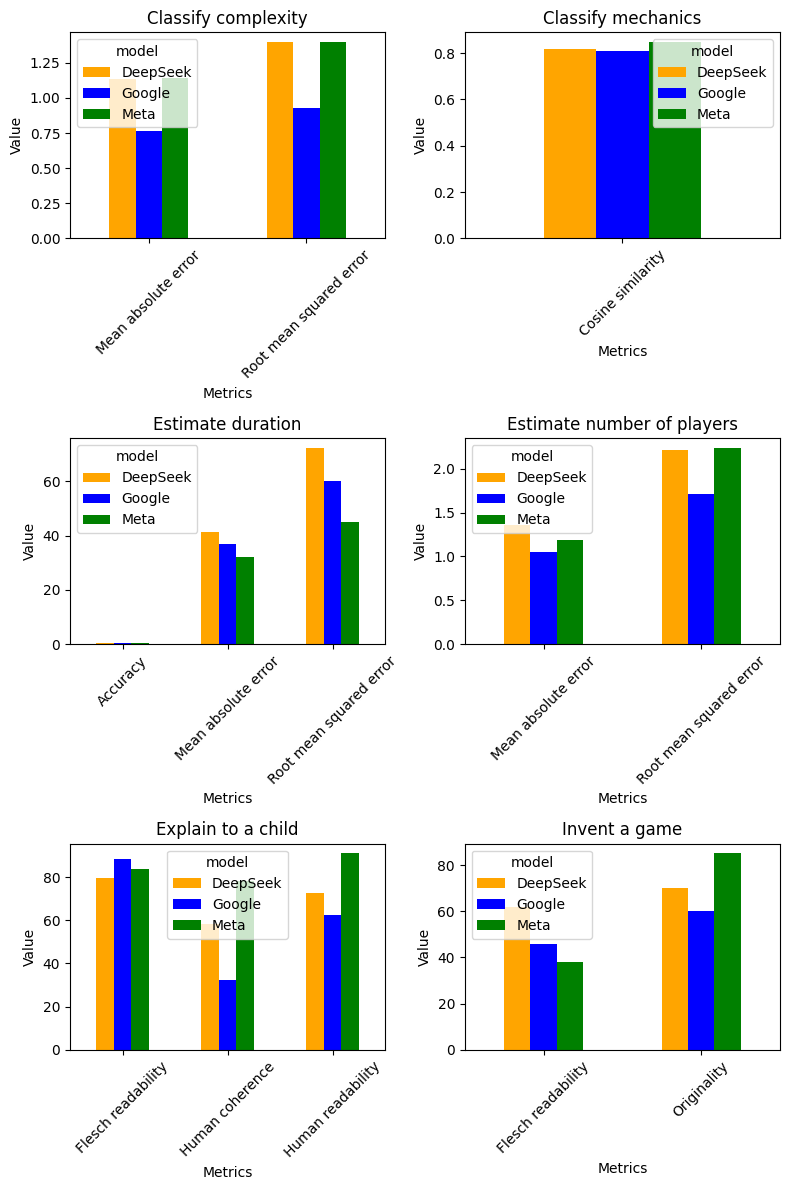

In [42]:
import matplotlib.pyplot as plt

df_melted = results.melt(id_vars=["Task", "Metrics"], 
                    value_vars=["Google", "DeepSeek", "Meta"],
                    var_name="model", value_name="value")

plt.figure(figsize=(8, 12))
for i, (task, group) in enumerate(df_melted.groupby("Task")):
    plt.subplot(3, 2, i+1)
    pivot = group.pivot(index="Metrics", columns="model", values="value")
    pivot.plot(kind="bar", ax=plt.gca(), rot=45, color=["orange", "blue", "green"])
    plt.title(task)
    plt.ylabel("Value")
    plt.tight_layout()

plt.show()


<Axes: >

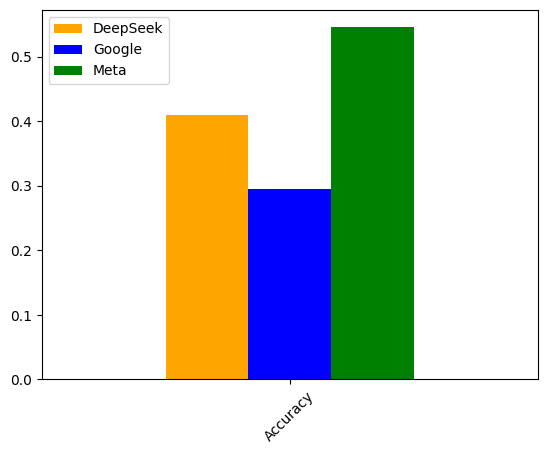

In [43]:
accuracy_df = pd.DataFrame({"DeepSeek": results.loc[12]["DeepSeek"], "Google": results.loc[12]["Google"], "Meta": results.loc[12]["Meta"]}, index=["Accuracy"])
accuracy_df.plot.bar(rot=45, color=["orange", "blue", "green"])

#### Explainability of the results

In [44]:
saved_games_llms_data_df.columns

Index(['id', 'category', 'name', 'min_players', 'max_players',
       'average_player_suggestions', 'player_suggestions', 'playing_time',
       'rating_average_weight', 'how to play', 'mechanics',
       'explanation_Google', 'explanation_Google_flesch_score',
       'explanation_Google_human_score', 'mechanics_Google', 'weight_Google',
       'players_number_Google', 'duration_Google', 'explanation_DeepSeek',
       'explanation_DeepSeek_flesch_score', 'explanation_DeepSeek_human_score',
       'mechanics_DeepSeek', 'weight_DeepSeek', 'players_number_DeepSeek',
       'duration_DeepSeek', 'explanation_Meta',
       'explanation_Meta_flesch_score', 'explanation_Meta_human_score',
       'mechanics_Meta', 'weight_Meta', 'players_number_Meta', 'duration_Meta',
       'explanation_Google_coherence_score',
       'explanation_DeepSeek_coherence_score',
       'explanation_Meta_coherence_score', 'mechanics_similarity_Google',
       'mechanics_similarity_DeepSeek', 'mechanics_similarity_Me

In [45]:
def create_heatmap_data_task_a(company):
    return saved_games_llms_data_df[saved_games_llms_data_df[f"explanation_{company}_flesch_score"]!= 0].groupby("category")[[f"explanation_{company}_flesch_score", f"explanation_{company}_human_score", f"explanation_{company}_coherence_score"]].mean()

In [46]:
google_heatmap_data_task_a = create_heatmap_data_task_a("Google")
deepseek_heatmap_data_task_a = create_heatmap_data_task_a("DeepSeek")
meta_heatmap_data_task_a =create_heatmap_data_task_a("Meta")

In [47]:
import seaborn as sns

<Axes: ylabel='category'>

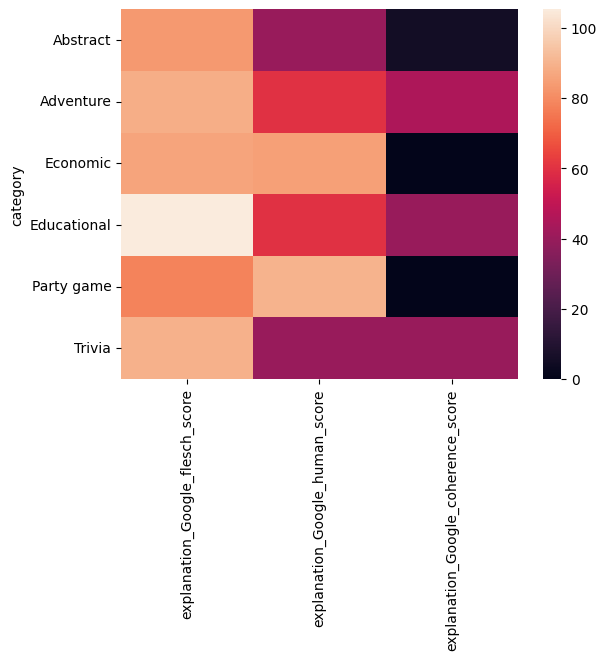

In [48]:
sns.heatmap(google_heatmap_data_task_a)

<Axes: ylabel='category'>

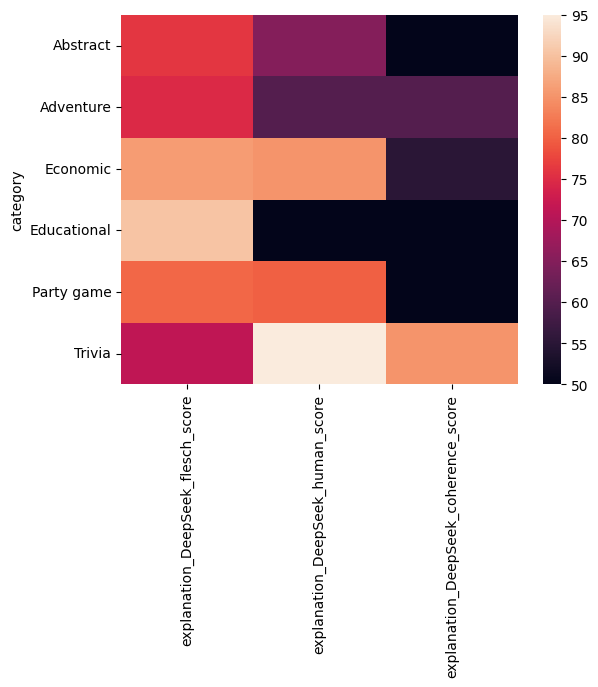

In [49]:
sns.heatmap(deepseek_heatmap_data_task_a)


<Axes: ylabel='category'>

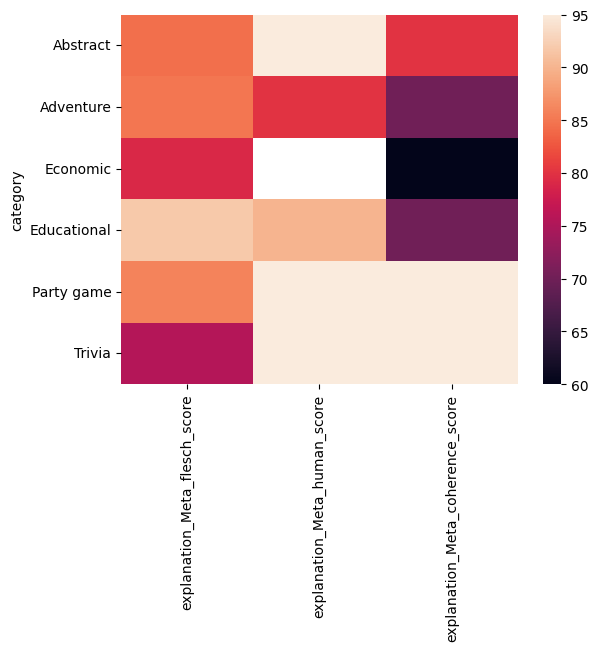

In [50]:
sns.heatmap(meta_heatmap_data_task_a)

In [52]:
heatmap_data_mechanics_c = saved_games_llms_data_df.groupby("category")[[f"mechanics_similarity_Google", f"mechanics_similarity_DeepSeek",f"mechanics_similarity_Meta"]].mean()
heatmap_data_weight_c = (saved_games_llms_data_df_filtered.groupby("category").apply(lambda g: mean_absolute_error(g["rating_average_weight"], g[f"weight_Google"])).reset_index(name="weight_mae_Google")
    .merge(
        saved_games_llms_data_df_filtered.groupby("category")
        .apply(lambda g: mean_absolute_error(g["rating_average_weight"], g["weight_DeepSeek"]))
        .reset_index(name="weight_mae_DeepSeek"),
        on="category",
        how="left"
    )
    .merge(
        saved_games_llms_data_df_filtered.groupby("category")
        .apply(lambda g: mean_absolute_error(g["rating_average_weight"], g["weight_Meta"]))
        .reset_index(name="weight_mae_Meta"),
        on="category",
        how="left"
    )
).set_index("category")
heatmap_data_n_players_c = (saved_games_llms_data_df_filtered.groupby("category").apply(lambda g: mean_absolute_error(g["average_player_suggestions"], g[f"players_number_Google"])).reset_index(name="n_players_mae_Google")
    .merge(
        saved_games_llms_data_df_filtered.groupby("category")
        .apply(lambda g: mean_absolute_error(g["average_player_suggestions"], g["players_number_DeepSeek"]))
        .reset_index(name="n_players_mae_DeepSeek"),
        on="category",
        how="left"
    )
    .merge(
        saved_games_llms_data_df_filtered.groupby("category")
        .apply(lambda g: mean_absolute_error(g["average_player_suggestions"], g["players_number_Meta"]))
        .reset_index(name="n_players_mae_Meta"),
        on="category",
        how="left"
    )
).set_index("category")
heatmap_data_duration_c = (saved_games_llms_data_df_filtered.groupby("category").apply(lambda g: mean_absolute_error(g["playing_time"], g[f"duration_Google"])).reset_index(name="duration_mae_Google")
        .merge(
        saved_games_llms_data_df_filtered.groupby("category")
        .apply(lambda g: mean_absolute_error(g["playing_time"], g["duration_DeepSeek"]))
        .reset_index(name="duration_mae_DeepSeek"),
        on="category",
        how="left"
    )
    .merge(
        saved_games_llms_data_df_filtered.groupby("category")
        .apply(lambda g: mean_absolute_error(g["playing_time"], g["duration_Meta"]))
        .reset_index(name="duration_mae_Meta"),
        on="category",
        how="left"
    )
).set_index("category")
heatmap_data_duration_accuracy_c = (saved_games_llms_data_df_filtered.groupby("category").apply(lambda g: accuracy_score(g["playing_time"].apply(set_duration_label), g[f"duration_Google_interval"])).reset_index(name="duration_accuracy_Google")
        .merge(
        saved_games_llms_data_df_filtered.groupby("category")
        .apply(lambda g: accuracy_score(g["playing_time"].apply(set_duration_label), g[f"duration_DeepSeek_interval"]))
        .reset_index(name="duration_accuracy_DeepSeek"),
        on="category",
        how="left"
    )
       .merge(
        saved_games_llms_data_df_filtered.groupby("category")
        .apply(lambda g: accuracy_score(g["playing_time"].apply(set_duration_label), g[f"duration_Meta_interval"]))
        .reset_index(name="duration_accuracy_Meta"),
        on="category",
        how="left"
    )
).set_index("category")

/var/folders/d1/155l7gvx13g3mwxhng7df1qr0000gn/T/ipykernel_34929/3594534297.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  heatmap_data_weight_c = (saved_games_llms_data_df_filtered.groupby("category").apply(lambda g: mean_absolute_error(g["rating_average_weight"], g[f"weight_Google"])).reset_index(name="weight_mae_Google")
/var/folders/d1/155l7gvx13g3mwxhng7df1qr0000gn/T/ipykernel_34929/3594534297.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns af

<Axes: ylabel='category'>

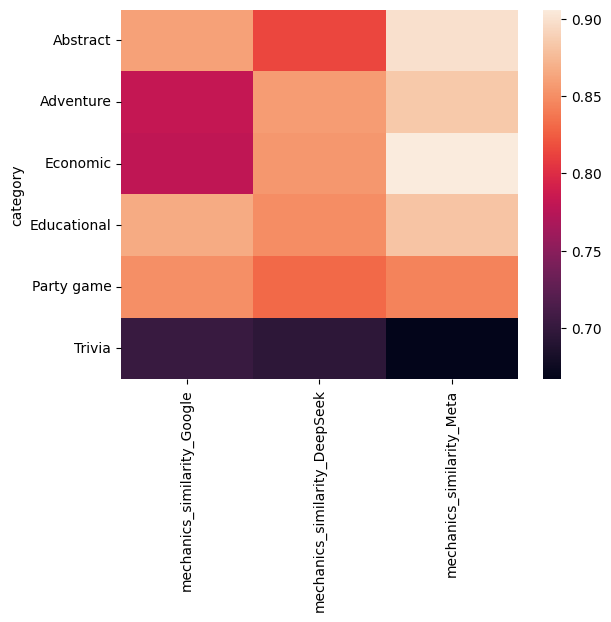

In [54]:
sns.heatmap(heatmap_data_mechanics_c)

<Axes: ylabel='category'>

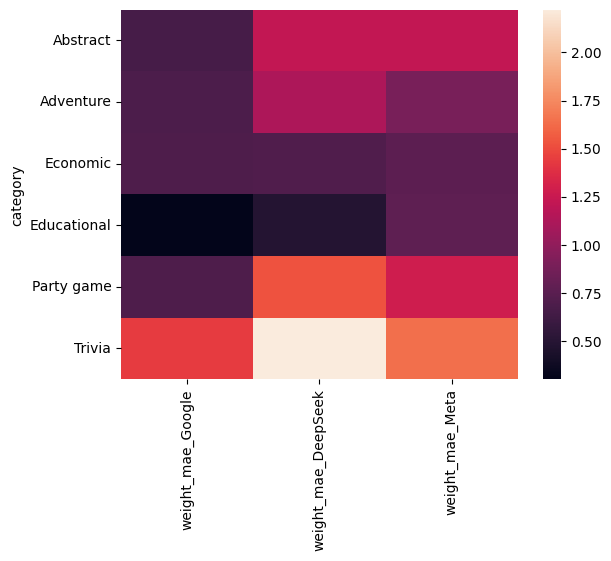

In [55]:
sns.heatmap(heatmap_data_weight_c)

In [90]:
heatmap_data_n_players_c

,n_players_mae_Google,n_players_mae_DeepSeek,n_players_mae_Meta
category,,,
Abstract,1.000000,13.750000,0.375000
Adventure,1.000000,26.125000,0.250000
Economic,0.400000,0.600000,0.600000
Educational,0.428571,14.285714,0.571429
Party game,1.500000,1.833333,1.833333
Trivia,1.400000,2.000000,3.000000


In [91]:
normalized_heatmap_data_n_players_c = (heatmap_data_n_players_c - heatmap_data_n_players_c.min())/(heatmap_data_n_players_c.max() - heatmap_data_n_players_c.min())
normalized_heatmap_data_n_players_c

,n_players_mae_Google,n_players_mae_DeepSeek,n_players_mae_Meta
category,,,
Abstract,0.545455,0.515181,0.045455
Adventure,0.545455,1.000000,0.000000
Economic,0.000000,0.000000,0.127273
Educational,0.025974,0.536169,0.116883
Party game,1.000000,0.048319,0.575758
Trivia,0.909091,0.054848,1.000000


<Axes: ylabel='category'>

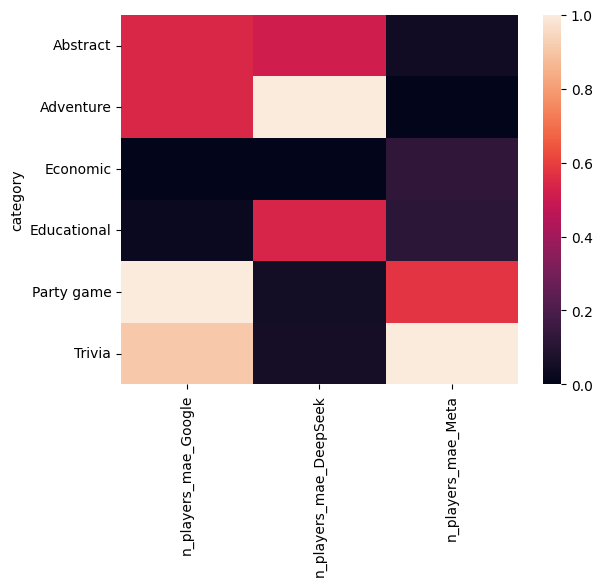

In [73]:
sns.heatmap(normalized_heatmap_data_n_players_c)

In [58]:
heatmap_data_duration_c

,duration_mae_Google,duration_mae_DeepSeek,duration_mae_Meta
category,,,
Abstract,23.625000,20.750000,9.375000
Adventure,98.000000,2534.000000,60.000000
Economic,73.000000,41.500000,37.700000
Educational,49.000000,35.714286,32.714286
Party game,42.833333,27.000000,31.333333
Trivia,25.600000,23.800000,14.000000


In [74]:
normalized_data_duration_c = (heatmap_data_duration_c - heatmap_data_duration_c.min())/(heatmap_data_duration_c.max() - heatmap_data_duration_c.min())

<Axes: ylabel='category'>

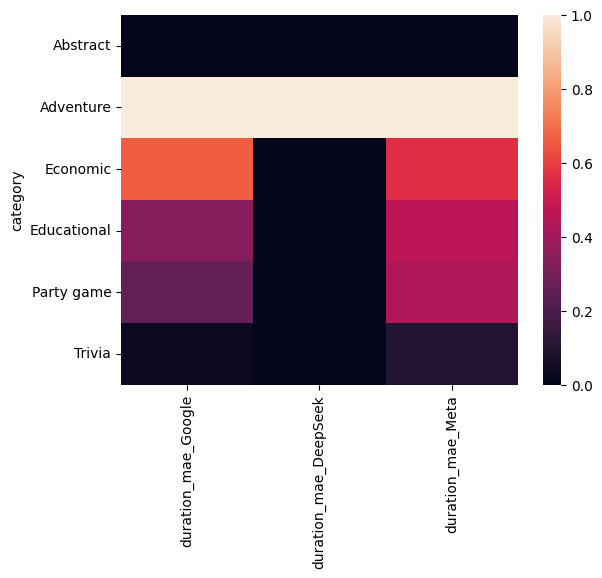

In [75]:
sns.heatmap(normalized_data_duration_c)

<Axes: ylabel='category'>

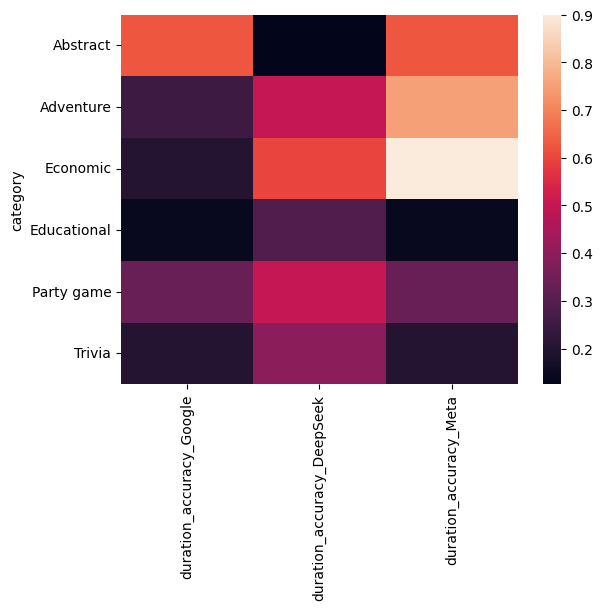

In [60]:
sns.heatmap(heatmap_data_duration_accuracy_c)

#### Analyzing examples

In [ ]:
saved_games_llms_data_df[saved_games_llms_data_df["category"]=="Abstract"][["name", "playing_time", "duration_Google", "duration_DeepSeek", "duration_Meta"]]

,name,playing_time,duration_Google,duration_DeepSeek,duration_Meta
50,Trivial Pursuit: Classic Edition,90,-1,30,-1
51,Think 'n Sync: The Great Minds Think Alike Game,0,-1,60,-1
52,Blockbuster,60,-1,60,30
53,Map It! World Edition,20,30,30,-1
54,Colourbrain,30,-1,2,30
55,Wits & Wagers,25,30,-1,30
56,Crack List,40,-1,100,-1
57,Hitster,30,-1,90,0
58,Anomia,30,30,25,25
59,30 Seconds,30,-1,120,-1
